<a href="https://colab.research.google.com/github/vincentjunitio00/Rock-Paper-Scizzor-Image-Recognition/blob/master/Rock_Paper_Scizzor_Self_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-07-12 05:35:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  33.5MB/s    in 5.7s    

2020-07-12 05:35:12 (33.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-07-12 05:35:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('Rock training images:', len(os.listdir(rock_dir)))
print('Paper training images:', len(os.listdir(paper_dir)))
print('Scissors training images:', len(os.listdir(scissors_dir)))

Rock training images: 840
Paper training images: 840
Scissors training images: 840


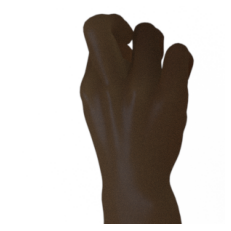

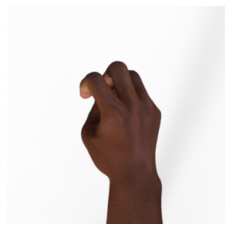

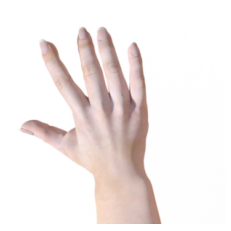

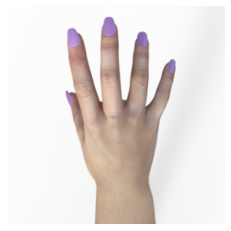

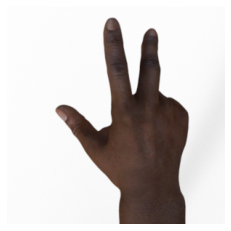

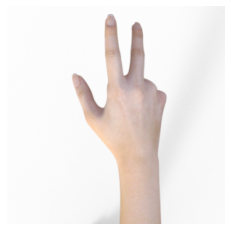

In [4]:
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

--2020-07-12 05:36:59--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 108.177.97.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  89.3MB/s    in 0.9s    

2020-07-12 05:37:00 (89.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [7]:
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [31]:
inp = tf.keras.layers.Input(shape=(150,150,3))
x = tf.keras.layers.Conv2D(128, (3,3))(inp)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(128, (3,3))(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(128, (3,3))(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(128, (3,3))(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(128, (3,3))(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inp, x)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0   

In [25]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model( pre_trained_model.input, x) 
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [32]:
training_dir = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_dir = "/tmp/rps-test-set/"
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

test_generator = test_datagen.flow_from_directory(
	test_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=20
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=100, steps_per_epoch=20, validation_data = test_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/100
20/20 [==============================] - 4s 213ms/step - loss: 4.0843 - accuracy: 0.3575 - val_loss: 1.1228 - val_accuracy: 0.2667
Epoch 2/100
20/20 [==============================] - 4s 216ms/step - loss: 1.1181 - accuracy: 0.3400 - val_loss: 1.0886 - val_accuracy: 0.4000
Epoch 3/100
20/20 [==============================] - 4s 211ms/step - loss: 1.1611 - accuracy: 0.3350 - val_loss: 1.0892 - val_accuracy: 0.4833
Epoch 4/100
20/20 [==============================] - 4s 210ms/step - loss: 1.1383 - accuracy: 0.3475 - val_loss: 1.1005 - val_accuracy: 0.2667
Epoch 5/100
20/20 [==============================] - 4s 209ms/step - loss: 1.1451 - accuracy: 0.3225 - val_loss: 1.0355 - val_accuracy: 0.5333
Epoch 6/100
20/20 [==============================] - 4s 209ms/step - loss: 1.3982 - accuracy: 0.3675 - val_loss: 1.0859 - val_accuracy: 0.2667
Epoch 7/100
20/20 [==============================] - 4s 211ms/step - loss: 1.1563 - accuracy: 0.4000 - val_loss: 1.0251 - val_accuracy: 0.5500

<Figure size 432x288 with 0 Axes>

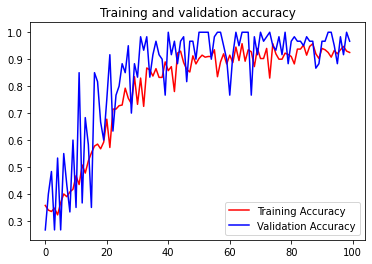

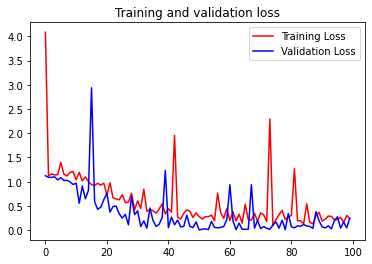

<Figure size 432x288 with 0 Axes>

In [34]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.figure()


In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=25)
  if(classes[0][0]==1.):
    print("It's a paper")
  elif(classes[0][1]==1.):
    print("It's a rock")
  else:
    print("It's a scizzors")

Using TensorFlow backend.


Saving Paper1.jpg to Paper1.jpg
Saving Paper2.jpg to Paper2.jpg
Saving Paper3.jpg to Paper3.jpg
Saving Paper4.jpg to Paper4.jpg
Saving Paper5.jpg to Paper5.jpg
Saving Paper6.jpg to Paper6.jpg
Saving Paper7.jpg to Paper7.jpg
Saving Rock1.jpg to Rock1.jpg
Saving Rock2.jpg to Rock2.jpg
Saving Rock3.jpg to Rock3.jpg
Saving Rock4.jpg to Rock4.jpg
Saving Rock5.jpg to Rock5.jpg
Saving Rock6.jpg to Rock6.jpg
Saving Rock7.jpg to Rock7.jpg
Saving Rock8.jpg to Rock8.jpg
Saving Scizzors1.jpg to Scizzors1.jpg
Saving Scizzors2.jpg to Scizzors2.jpg
Saving Scizzors3.jpg to Scizzors3.jpg
Saving Scizzors4.jpg to Scizzors4.jpg
Saving Scizzors5.jpg to Scizzors5.jpg
It's a paper
It's a paper
It's a paper
It's a paper
It's a paper
It's a rock
It's a paper
It's a rock
It's a paper
It's a rock
It's a rock
It's a rock
It's a rock
It's a rock
It's a rock
It's a scizzors
It's a scizzors
It's a rock
It's a paper
It's a scizzors
